In [1]:
!pip install scikit-learn
!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import wilcoxon
from scipy import stats
from sklearn.model_selection import train_test_split

EDA

In [4]:
df=pd.read_csv('churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print('Number of rows:',df.shape[0]) 
print('Number of columns:',df.shape[1]) 

Number of rows: 7043
Number of columns: 21


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
print(f"The amount of duplicated numbers are {df.duplicated().sum()}")

The amount of duplicated numbers are 0


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


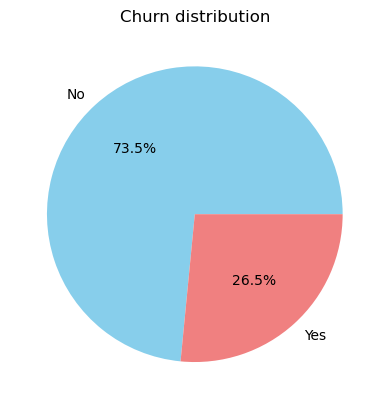

In [9]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Churn distribution')
plt.ylabel('') 
plt.show()


/var/folders/4_/wc7y9d953kx0rs3vk8lkbcjh0000gq/T/ipykernel_52853/1329689622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


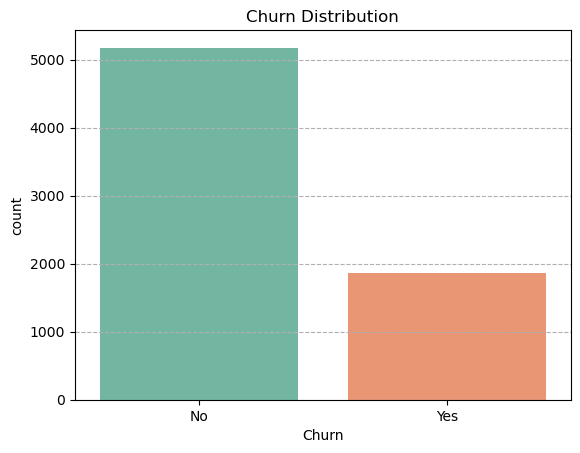

In [10]:
#3. התפלגות משתנה עזיבה  (לפני חלוקה):
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.grid(axis='y', linestyle='--')
plt.show()



In [11]:
df[['tenure']].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


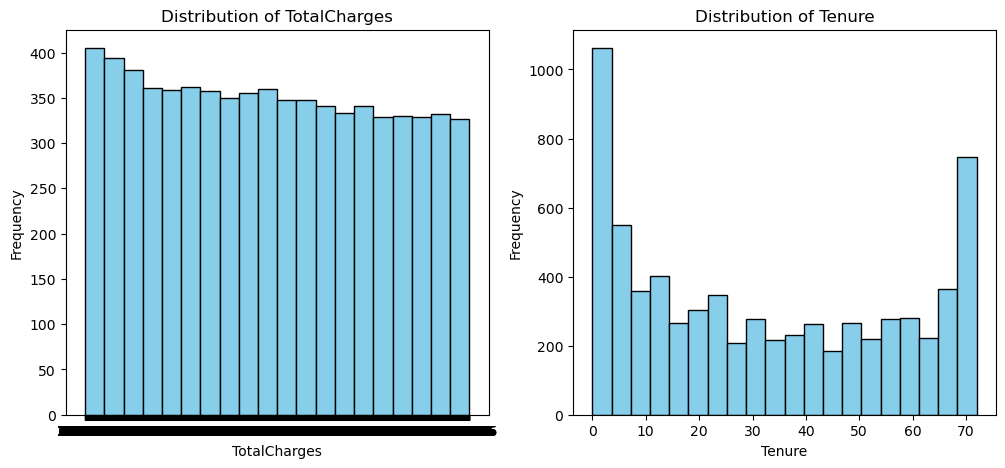

In [12]:
#פירוט 1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף 1 התפלגות TotalCharges
axes[0].hist(df['TotalCharges'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of TotalCharges')
axes[0].set_xlabel('TotalCharges')
axes[0].set_ylabel('Frequency')

# גרף 2 התפלגות Tenure
axes[1].hist(df['tenure'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Distribution of Tenure')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Frequency')

plt.show()



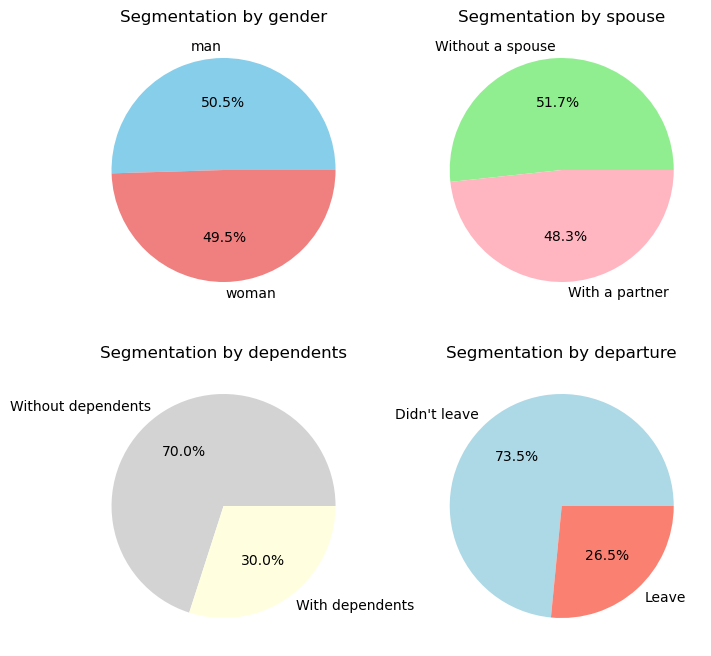

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# פילוח לפי מגדר
gender_counts = df['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=["man", "woman"], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Segmentation by gender')

# פילוח לפי בן/בת זוג
partner_counts = df['Partner'].value_counts()
axes[0, 1].pie(partner_counts, labels=['Without a spouse', 'With a partner'], autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])
axes[0, 1].set_title('Segmentation by spouse')

# פילוח לפי תלויים
dependents_counts = df['Dependents'].value_counts()
axes[1, 0].pie(dependents_counts, labels=['Without dependents', 'With dependents'], autopct='%1.1f%%', colors=['lightgrey', 'lightyellow'])
axes[1, 0].set_title('Segmentation by dependents')

# פילוח לפי עזיבה
churn_counts = df['Churn'].value_counts()
axes[1, 1].pie(churn_counts, labels=['Didn\'t leave', 'Leave'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[1, 1].set_title('Segmentation by departure')


plt.show()


KeyError: "None of [Index(['TotalCharges'], dtype='object')] are in the [columns]"

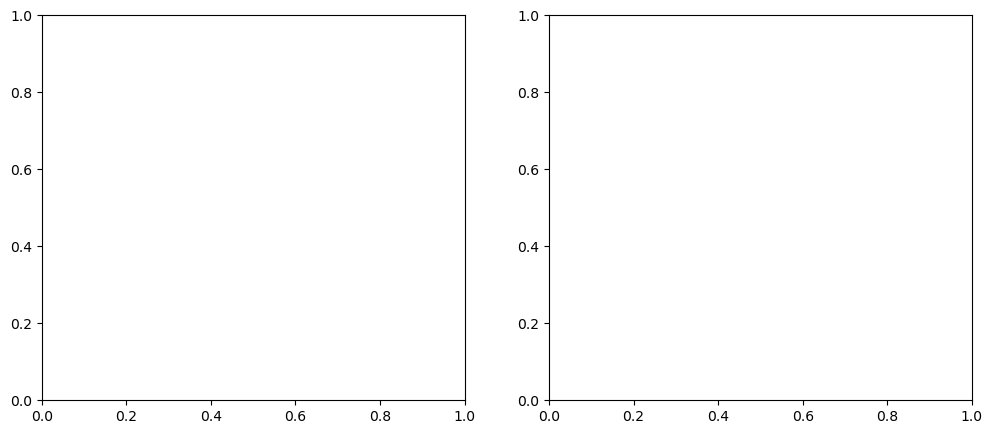

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף 1 Boxplot ל-TotalCharges
df.boxplot(column='TotalCharges', ax=axes[0])
axes[0].set_title('Boxplot of Total Charges')
axes[0].set_ylabel('Total Charges')

# גרף 2 Boxplot ל-Tenure
df.boxplot(column='tenure', ax=axes[1])
axes[1].set_title('Boxplot of Tenure')
axes[1].set_ylabel('Tenure')

plt.show()



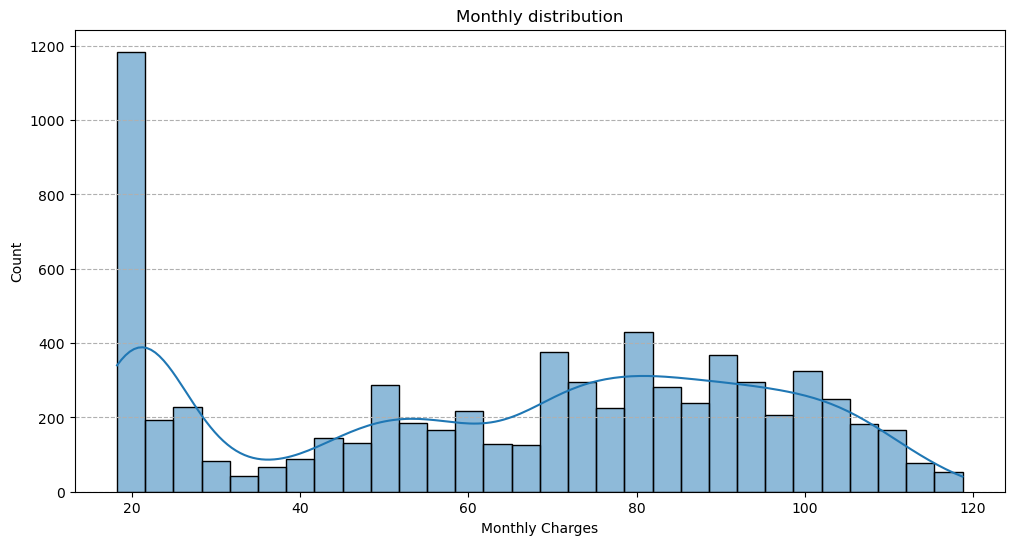

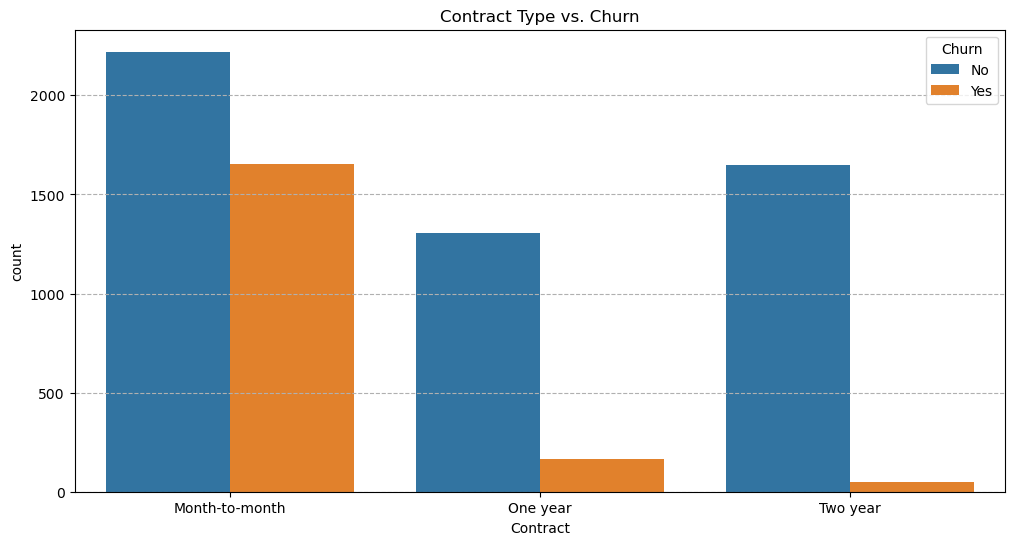

In [16]:
#  גרף התפלגות עמודה מספרית (MonthlyCharges)


plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly distribution')
plt.xlabel('Monthly Charges')
plt.grid(axis='y', linestyle='--')
plt.show()

#  גרף פילוח לפי Contract ו-Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs. Churn')
plt.grid(axis='y', linestyle='--')
plt.show()


In [17]:
df.loc[df.Churn == 'No','Churn'] =0
df.loc[df.Churn == 'Yes','Churn'] =1

df.loc[df.gender == 'Male','gender']=0
df.loc[df.gender == 'Female','gender']=1

df.loc[df.Partner == 'No','Partner']=0
df.loc[df.Partner == 'Yes','Partner']=1

df.loc[df.Dependents == 'No','Dependents']=0
df.loc[df.Dependents == 'Yes','Dependents']=1

df.loc[df.PhoneService == 'No','PhoneService'] =0
df.loc[df.PhoneService == 'Yes','PhoneService'] =1

df.loc[df.MultipleLines == 'No','MultipleLines'] =0
df.loc[df.MultipleLines == 'Yes','MultipleLines'] =1
df.loc[df.MultipleLines == 'No phone service','MultipleLines'] =2

df.loc[df.InternetService == 'DSL','InternetService'] =0
df.loc[df.InternetService == 'Fiber optic','InternetService'] =1
df.loc[df.InternetService == 'No','InternetService'] =2

df.loc[df.OnlineSecurity == 'No','OnlineSecurity'] =0
df.loc[df.OnlineSecurity == 'Yes','OnlineSecurity'] =1
df.loc[df.OnlineSecurity == 'No internet service','OnlineSecurity'] =2

df.loc[df.OnlineBackup == 'No','OnlineBackup'] =0
df.loc[df.OnlineBackup == 'Yes','OnlineBackup'] =1
df.loc[df.OnlineBackup == 'No internet service','OnlineBackup'] =2

df.loc[df.DeviceProtection == 'No','DeviceProtection'] =0
df.loc[df.DeviceProtection == 'Yes','DeviceProtection'] =1
df.loc[df.DeviceProtection == 'No internet service','DeviceProtection'] =2

df.loc[df.TechSupport == 'No','TechSupport'] =0
df.loc[df.TechSupport == 'Yes','TechSupport'] =1
df.loc[df.TechSupport == 'No internet service','TechSupport'] =2

df.loc[df.StreamingTV == 'No','StreamingTV'] =0
df.loc[df.StreamingTV == 'Yes','StreamingTV'] =1
df.loc[df.StreamingTV == 'No internet service','StreamingTV'] =2

df.loc[df.StreamingMovies == 'No','StreamingMovies'] =0
df.loc[df.StreamingMovies == 'Yes','StreamingMovies'] =1
df.loc[df.StreamingMovies == 'No internet service','StreamingMovies'] =2

df.loc[df.Contract == 'Month-to-month','Contract'] =0
df.loc[df.Contract == 'One year','Contract'] =1
df.loc[df.Contract == 'Two year','Contract'] =2

df.loc[df.PaperlessBilling == 'No','PaperlessBilling'] =0
df.loc[df.PaperlessBilling == 'Yes','PaperlessBilling'] =1

df.loc[df.PaymentMethod == 'Electronic check','PaymentMethod'] =0
df.loc[df.PaymentMethod == 'Mailed check','PaymentMethod'] =1
df.loc[df.PaymentMethod == 'Bank transfer (automatic)','PaymentMethod'] =2
df.loc[df.PaymentMethod == 'Credit card (automatic)','PaymentMethod'] =3



df = df.astype({'Churn': 'int64'})
df = df.astype({'gender': 'int64'})
df = df.astype({'Partner': 'int64'})
df = df.astype({'Dependents': 'int64'})
df = df.astype({'PhoneService': 'int64'})
df = df.astype({'MultipleLines': 'int64'})
df = df.astype({'InternetService': 'int64'})
df = df.astype({'OnlineSecurity': 'int64'})
df = df.astype({'OnlineBackup': 'int64'})
df = df.astype({'DeviceProtection': 'int64'})
df = df.astype({'TechSupport': 'int64'})
df = df.astype({'StreamingTV': 'int64'})
df = df.astype({'StreamingMovies': 'int64'})
df = df.astype({'Contract': 'int64'})
df = df.astype({'PaperlessBilling': 'int64'})
df = df.astype({'PaymentMethod': 'int64'})


df['TotalCharges'] = df['TotalCharges'].str.strip() 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# הצגת השורות הבעייתיות
problem_rows = df[df['TotalCharges'].isna()]

problem_rows = problem_rows[['customerID', 'TotalCharges']]

print(problem_rows['customerID'].count(),problem_rows)

11       customerID  TotalCharges
488   4472-LVYGI           NaN
753   3115-CZMZD           NaN
936   5709-LVOEQ           NaN
1082  4367-NUYAO           NaN
1340  1371-DWPAZ           NaN
3331  7644-OMVMY           NaN
3826  3213-VVOLG           NaN
4380  2520-SGTTA           NaN
5218  2923-ARZLG           NaN
6670  4075-WKNIU           NaN
6754  2775-SEFEE           NaN


In [20]:
df = df.dropna(subset=['TotalCharges'])

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#פירוט 3

# סט 1 חלוקה רחבה
def categorize_tenure_set1(tenure):
    if tenure <= 12:
        return '0-12'
    elif 13 <= tenure <= 36:
        return '13-36'
    elif 37 <= tenure <= 60:
        return '37-60'
    else:
        return '60+'

# סט 2 (6 חודשים)
def categorize_tenure_set2(tenure):
    if tenure <= 6:
        return '0-6'
    elif 7 <= tenure <= 12:
        return '7-12'
    elif 13 <= tenure <= 18:
        return '13-18'
    elif 19 <= tenure <= 24:
        return '19-24'
    elif 25 <= tenure <= 30:
        return '25-30'
    elif 31 <= tenure <= 36:
        return '31-36'
    elif 37 <= tenure <= 42:
        return '37-42'
    elif 43 <= tenure <= 48:
        return '43-48'
    elif 49 <= tenure <= 54:
        return '49-54'
    elif 55 <= tenure <= 60:
        return '55-60'
    else:
        return '60+'

# סט 3 (10 חודשים)
def categorize_tenure_set3(tenure):
    if tenure <= 10:
        return '0-10'
    elif 11 <= tenure <= 20:
        return '11-20'
    elif 21 <= tenure <= 30:
        return '21-30'
    elif 31 <= tenure <= 40:
        return '31-40'
    elif 41 <= tenure <= 50:
        return '41-50'
    elif 51 <= tenure <= 60:
        return '51-60'
    else:
        return '60+'

df['tenure_category_set1'] = df['tenure'].apply(categorize_tenure_set1)
df['tenure_category_set2'] = df['tenure'].apply(categorize_tenure_set2)
df['tenure_category_set3'] = df['tenure'].apply(categorize_tenure_set3)

categories_set1 = ['0-12', '13-36', '37-60', '60+']
categories_set2 = ['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '60+']
categories_set3 = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']


In [23]:
stats_set1 = df.groupby('tenure_category_set1')['MonthlyCharges'].agg(['mean', 'std'])
stats_set2 = df.groupby('tenure_category_set2')['MonthlyCharges'].agg(['mean', 'std'])
stats_set3 = df.groupby('tenure_category_set3')['MonthlyCharges'].agg(['mean', 'std'])

avg_std_set1 = stats_set1['std'].mean()
avg_std_set2 = stats_set2['std'].mean()
avg_std_set3 = stats_set3['std'].mean()


In [24]:
print("\n       Set:1\n")                                    #האם נחוץ להציג תוצאות אלו  ??

data_set1 = {
    'category': categories_set1,
    'mean': stats_set1['mean'],
    'std': stats_set1['std']
}
df_set1 = pd.DataFrame(data_set1).round(2)
df_set1.loc['mean'] = ['mean', df_set1['mean'].mean().round(2), avg_std_set1.round(2)]
print(df_set1.to_string(index=False))

print("\n       Set:2\n")
data_set2 = {
    'category': categories_set2,
    'mean': stats_set2['mean'],
    'std': stats_set2['std']
}
df_set2 = pd.DataFrame(data_set2).round(2)
df_set2.loc['mean'] = ['mean', df_set2['mean'].mean().round(2), avg_std_set2.round(2)]
print(df_set2.to_string(index=False))

print("\n       Set:3\n")
data_set3 = {
    'category': categories_set3,
    'mean': stats_set3['mean'],
    'std': stats_set3['std']
}
df_set3 = pd.DataFrame(data_set3).round(2)
df_set3.loc['mean'] = ['mean', df_set3['mean'].mean().round(2), avg_std_set3.round(2)]
print(df_set3.to_string(index=False))




       Set:1

category  mean   std
    0-12 56.17 26.53
   13-36 63.25 28.82
   37-60 68.53 30.72
     60+ 75.95 31.85
    mean 65.97 29.48

       Set:2

category  mean   std
     0-6 54.84 25.89
    7-12 61.24 28.16
   13-18 61.50 28.89
   19-24 63.93 28.80
   25-30 67.34 29.32
   31-36 65.61 30.38
   37-42 67.02 31.15
   43-48 70.04 30.89
   49-54 71.07 30.25
   55-60 75.95 31.85
     60+ 58.95 27.64
    mean 65.23 29.38

       Set:3

category  mean   std
    0-10 56.02 26.32
   11-20 60.06 28.55
   21-30 63.29 28.58
   31-40 66.29 29.57
   41-50 68.20 31.09
   51-60 70.23 30.54
     60+ 75.95 31.85
    mean 65.72 29.50


In [25]:
df.loc[df.tenure_category_set1 == '0-12','tenure_category_set1']=0
df.loc[df.tenure_category_set1 == '13-36','tenure_category_set1']=1
df.loc[df.tenure_category_set1 == '37-60','tenure_category_set1']=2
df.loc[df.tenure_category_set1 == '60+','tenure_category_set1']=3

df.loc[df.tenure_category_set2 == '0-6','tenure_category_set2']=0
df.loc[df.tenure_category_set2 == '7-12','tenure_category_set2']=1
df.loc[df.tenure_category_set2 == '13-18','tenure_category_set2']=2
df.loc[df.tenure_category_set2 == '19-24','tenure_category_set2']=3
df.loc[df.tenure_category_set2 == '25-30','tenure_category_set2']=4
df.loc[df.tenure_category_set2 == '31-36','tenure_category_set2']=5
df.loc[df.tenure_category_set2 == '37-42','tenure_category_set2']=6
df.loc[df.tenure_category_set2 == '43-48','tenure_category_set2']=7
df.loc[df.tenure_category_set2 == '49-54','tenure_category_set2']=8
df.loc[df.tenure_category_set2 == '55-60','tenure_category_set2']=9
df.loc[df.tenure_category_set2 == '60+','tenure_category_set2']=10

df.loc[df.tenure_category_set3 == '0-10','tenure_category_set3']=0
df.loc[df.tenure_category_set3 == '11-20','tenure_category_set3']=1
df.loc[df.tenure_category_set3 == '21-30','tenure_category_set3']=2
df.loc[df.tenure_category_set3 == '31-40','tenure_category_set3']=3
df.loc[df.tenure_category_set3 == '41-50','tenure_category_set3']=4
df.loc[df.tenure_category_set3 == '51-60','tenure_category_set3']=5
df.loc[df.tenure_category_set3 == '60+','tenure_category_set3']=6


df = df.astype({'tenure_category_set1': 'int64'})
df = df.astype({'tenure_category_set2': 'int64'})
df = df.astype({'tenure_category_set3': 'int64'})


In [26]:
####פירוט 4

In [27]:
#קבוצה 1 שפירו

# בדיקת נורמליות (Shapiro-Wilk) ל- MonthlyCharges לפי tenure_category_set1
shapiro_set1_0 = stats.shapiro(df[df['tenure_category_set1'] == 0]['MonthlyCharges'])
shapiro_set1_1 = stats.shapiro(df[df['tenure_category_set1'] == 1]['MonthlyCharges'])
shapiro_set1_2 = stats.shapiro(df[df['tenure_category_set1'] == 2]['MonthlyCharges'])
shapiro_set1_3 = stats.shapiro(df[df['tenure_category_set1'] == 3]['MonthlyCharges'])

print("Shapiro-Wilk test results for Monthly Charges by tenure category set1")
print(f"Group 0-12 months: Statistical={shapiro_set1_0.statistic}, p-value={shapiro_set1_0.pvalue}")
print(f"Group 13-36 months: Statistical={shapiro_set1_1.statistic}, p-value={shapiro_set1_1.pvalue}")
print(f"Group 37-60 months: Statistical={shapiro_set1_2.statistic}, p-value={shapiro_set1_2.pvalue}")
print(f"Group 60+ months: Statistical={shapiro_set1_3.statistic}, p-value={shapiro_set1_3.pvalue}")

#לא מתפלג נורמאלי 

Shapiro-Wilk test results for Monthly Charges by tenure category set1
Group 0-12 months: Statistical=0.9167508482933044, p-value=5.106565293768904e-33
Group 13-36 months: Statistical=0.910061776638031, p-value=8.703725164484147e-32
Group 37-60 months: Statistical=0.9050280451774597, p-value=2.2182637285327786e-30
Group 60+ months: Statistical=0.8827259540557861, p-value=2.4715539850332734e-31


In [28]:
#קבוצה 2 שפירו

# בדיקת נורמליות (Shapiro-Wilk) ל- MonthlyCharges לפי tenure_category_set2 
group_2_0 = df[df['tenure_category_set2'] == 0]['MonthlyCharges']
group_2_1 = df[df['tenure_category_set2'] == 1]['MonthlyCharges']
group_2_2 = df[df['tenure_category_set2'] == 2]['MonthlyCharges']
group_2_3 = df[df['tenure_category_set2'] == 3]['MonthlyCharges']
group_2_4 = df[df['tenure_category_set2'] == 4]['MonthlyCharges']
group_2_5 = df[df['tenure_category_set2'] == 5]['MonthlyCharges']
group_2_6 = df[df['tenure_category_set2'] == 6]['MonthlyCharges']
group_2_7 = df[df['tenure_category_set2'] == 7]['MonthlyCharges']
group_2_8 = df[df['tenure_category_set2'] == 8]['MonthlyCharges']
group_2_9 = df[df['tenure_category_set2'] == 9]['MonthlyCharges']
group_2_10 = df[df['tenure_category_set2'] == 10]['MonthlyCharges']

#  Shapiro-Wilk על כל קבוצה בנפרד
shapiro_2_0 = stats.shapiro(group_2_0)
shapiro_2_1 = stats.shapiro(group_2_1)
shapiro_2_2 = stats.shapiro(group_2_2)
shapiro_2_3 = stats.shapiro(group_2_3)
shapiro_2_4 = stats.shapiro(group_2_4)
shapiro_2_5 = stats.shapiro(group_2_5)
shapiro_2_6 = stats.shapiro(group_2_6)
shapiro_2_7 = stats.shapiro(group_2_7)
shapiro_2_8 = stats.shapiro(group_2_8)
shapiro_2_9 = stats.shapiro(group_2_9)
shapiro_2_10 = stats.shapiro(group_2_10)

print("Shapiro-Wilk test results for Monthly Charges by tenure category set2")
print(f"Group 0-6: Statistical={shapiro_2_0.statistic}, p-value={shapiro_2_0.pvalue}")
print(f"Group 7-12: Statistical={shapiro_2_1.statistic}, p-value={shapiro_2_1.pvalue}")
print(f"Group 13-18: Statistical={shapiro_2_2.statistic}, p-value={shapiro_2_2.pvalue}")
print(f"Group 19-24: Statistical={shapiro_2_3.statistic}, p-value={shapiro_2_3.pvalue}")
print(f"Group 25-30: Statistical={shapiro_2_4.statistic}, p-value={shapiro_2_4.pvalue}")
print(f"Group 31-36: Statistical={shapiro_2_5.statistic}, p-value={shapiro_2_5.pvalue}")
print(f"Group 37-42: Statistical={shapiro_2_6.statistic}, p-value={shapiro_2_6.pvalue}")
print(f"Group 43-48: Statistical={shapiro_2_7.statistic}, p-value={shapiro_2_7.pvalue}")
print(f"Group 49-54: Statistical={shapiro_2_8.statistic}, p-value={shapiro_2_8.pvalue}")
print(f"Group 55-60: Statistical={shapiro_2_9.statistic}, p-value={shapiro_2_9.pvalue}")
print(f"Group 60+: Statistical={shapiro_2_10.statistic}, p-value={shapiro_2_10.pvalue}")

#לא מתפלג נורמאלי 

Shapiro-Wilk test results for Monthly Charges by tenure category set2
Group 0-6: Statistical=0.9153310656547546, p-value=6.77424913450065e-28
Group 7-12: Statistical=0.9142019748687744, p-value=1.5618547737708946e-19
Group 13-18: Statistical=0.9066137075424194, p-value=7.957819945533723e-18
Group 19-24: Statistical=0.906369149684906, p-value=1.5632379500360298e-16
Group 25-30: Statistical=0.9134154915809631, p-value=5.311998569148841e-15
Group 31-36: Statistical=0.9048385620117188, p-value=3.720738333997916e-15
Group 37-42: Statistical=0.9057350158691406, p-value=1.3278279910604492e-14
Group 43-48: Statistical=0.9066057801246643, p-value=1.2875438664186872e-14
Group 49-54: Statistical=0.8956050276756287, p-value=2.4657486436597306e-16
Group 55-60: Statistical=0.9068090915679932, p-value=3.2360008600420664e-15
Group 60+: Statistical=0.8827259540557861, p-value=2.4715539850332734e-31


In [29]:
#קבוצה 3 שפירו

group_3_0 = df[df['tenure_category_set3'] == 0]['MonthlyCharges']
group_3_1 = df[df['tenure_category_set3'] == 1]['MonthlyCharges']
group_3_2 = df[df['tenure_category_set3'] == 2]['MonthlyCharges']
group_3_3 = df[df['tenure_category_set3'] == 3]['MonthlyCharges']
group_3_4 = df[df['tenure_category_set3'] == 4]['MonthlyCharges']
group_3_5 = df[df['tenure_category_set3'] == 5]['MonthlyCharges']
group_3_6 = df[df['tenure_category_set3'] == 6]['MonthlyCharges']

#  Shapiro-Wilk על כל קבוצה בנפרד
shapiro_3_0 = stats.shapiro(group_3_0)
shapiro_3_1 = stats.shapiro(group_3_1)
shapiro_3_2 = stats.shapiro(group_3_2)
shapiro_3_3 = stats.shapiro(group_3_3)
shapiro_3_4 = stats.shapiro(group_3_4)
shapiro_3_5 = stats.shapiro(group_3_5)
shapiro_3_6 = stats.shapiro(group_3_6)

print("Shapiro-Wilk test results for Monthly Charges by tenure category set3")
print(f"Group 0-10: Statistical={shapiro_3_0.statistic}, p-value={shapiro_3_0.pvalue}")
print(f"Group 11-20: Statistical={shapiro_3_1.statistic}, p-value={shapiro_3_1.pvalue}")
print(f"Group 21-30: Statistical={shapiro_3_2.statistic}, p-value={shapiro_3_2.pvalue}")
print(f"Group 31-40: Statistical={shapiro_3_4.statistic}, p-value={shapiro_3_4.pvalue}")
print(f"Group 41-50: Statistical={shapiro_3_4.statistic}, p-value={shapiro_3_4.pvalue}")
print(f"Group 41-50: Statistical={shapiro_3_5.statistic}, p-value={shapiro_3_5.pvalue}")
print(f"Group 60+: Statistical={shapiro_3_6.statistic}, p-value={shapiro_3_6.pvalue}")

#לא מתפלג נורמאלי 

Shapiro-Wilk test results for Monthly Charges by tenure category set3
Group 0-10: Statistical=0.9160523414611816, p-value=1.1950727969824081e-31
Group 11-20: Statistical=0.906778872013092, p-value=4.0856652448770435e-23
Group 21-30: Statistical=0.9141649007797241, p-value=2.335462387717072e-20
Group 31-40: Statistical=0.9021033644676208, p-value=5.3015740599105344e-20
Group 41-50: Statistical=0.9021033644676208, p-value=5.3015740599105344e-20
Group 41-50: Statistical=0.9050532579421997, p-value=2.048169151604194e-20
Group 60+: Statistical=0.8827259540557861, p-value=2.4715539850332734e-31


In [30]:
# פירוט 5

In [31]:

# Levene  בדיקת שונות בין הקבוצות בסט 1 
group_1_0 = df[df['tenure_category_set1'] == 0]['MonthlyCharges']
group_1_1 = df[df['tenure_category_set1'] == 1]['MonthlyCharges']
group_1_2 = df[df['tenure_category_set1'] == 2]['MonthlyCharges']
group_1_3 = df[df['tenure_category_set1'] == 3]['MonthlyCharges']

levene_result_set1 = stats.levene(group_1_0, group_1_1, group_1_2, group_1_3)

# Levene  בדיקת שונות בין הקבוצות בסט 2 
group_2_0 = df[df['tenure_category_set2'] == 0]['MonthlyCharges']
group_2_1 = df[df['tenure_category_set2'] == 1]['MonthlyCharges']
group_2_2 = df[df['tenure_category_set2'] == 2]['MonthlyCharges']
group_2_3 = df[df['tenure_category_set2'] == 3]['MonthlyCharges']
levene_result_set2 = stats.levene(group_2_0, group_2_1, group_2_2, group_2_3)

# Levene  בדיקת שונות בין הקבוצות בסט 3 
group_3_0 = df[df['tenure_category_set3'] == 0]['MonthlyCharges']
group_3_1 = df[df['tenure_category_set3'] == 1]['MonthlyCharges']
group_3_2 = df[df['tenure_category_set3'] == 2]['MonthlyCharges']
group_3_3 = df[df['tenure_category_set3'] == 3]['MonthlyCharges']
levene_result_set3 = stats.levene(group_3_0, group_3_1, group_3_2, group_3_3)

print("Lenvene Test Results: Set 1")
print(f"statistical={levene_result_set1.statistic}, p-value={levene_result_set1.pvalue}")

print("Lenvene Test Results: Set 2")
print(f"statistical={levene_result_set2.statistic}, p-value={levene_result_set2.pvalue}")

print("Lenvene Test Results: Set 3")
print(f"statistical={levene_result_set3.statistic}, p-value={levene_result_set3.pvalue}")

#בכול הסטים ה P קטן מ 0.05  ולכן דוחים השערת האפס ויש שונות בן הקבוצות בתוך הסטים
#דוחים את השערת האפס  יש הבדל מובהק בשונויות בתוך הקבוצות.


Lenvene Test Results: Set 1
statistical=11.616698790150148, p-value=1.3648184195887986e-07
Lenvene Test Results: Set 2
statistical=4.805912678637969, p-value=0.0024223909319537585
Lenvene Test Results: Set 3
statistical=5.384234619499989, p-value=0.0010694350476831817


In [32]:
#באופן שרירותי נבחר סט 2

In [33]:
#גרף 1.1

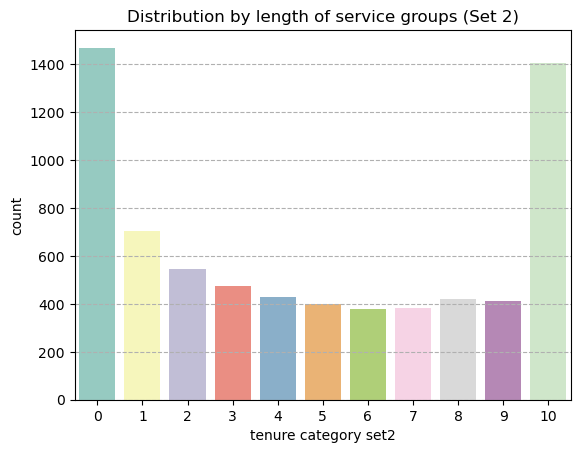

In [34]:
#4. התפלגות לפי סט 2 (אחרי חלוקה):
sns.countplot(x='tenure_category_set2', data=df, palette='Set3')
plt.title('Distribution by length of service groups (Set 2)')
plt.xlabel('tenure category set2')
plt.grid(axis='y', linestyle='--')
plt.show()


In [35]:
#גרף 3

In [36]:
#6. מאפיינים אישיים לפי סט 2

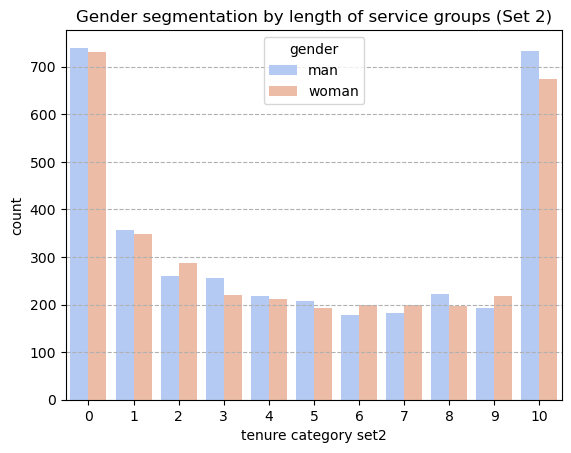

In [37]:
sns.countplot(x='tenure_category_set2', hue='gender', data=df, palette='coolwarm')
plt.title('Gender segmentation by length of service groups (Set 2)')
plt.xlabel('tenure category set2')
plt.legend(title='gender', labels=['man', 'woman'])
plt.grid(axis='y', linestyle='--')
plt.show()


In [38]:
#גרף 4

In [39]:
#לזהות חריגות והתפלגות התשלומים החודשיים לפי הקבוצות

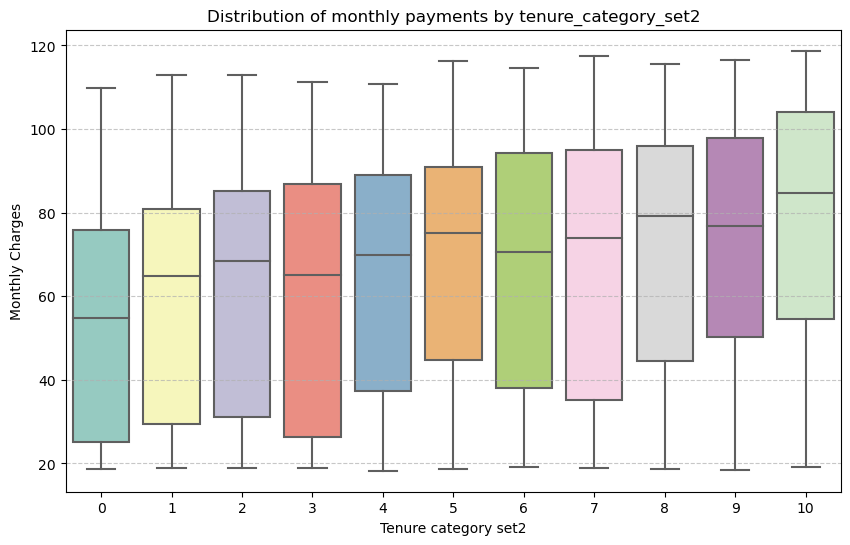

In [40]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure_category_set2', y='MonthlyCharges', data=df, palette='Set3')
plt.title('Distribution of monthly payments by tenure_category_set2')
plt.xlabel('Tenure category set2')
plt.ylabel('Monthly Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [41]:
#גרף 5

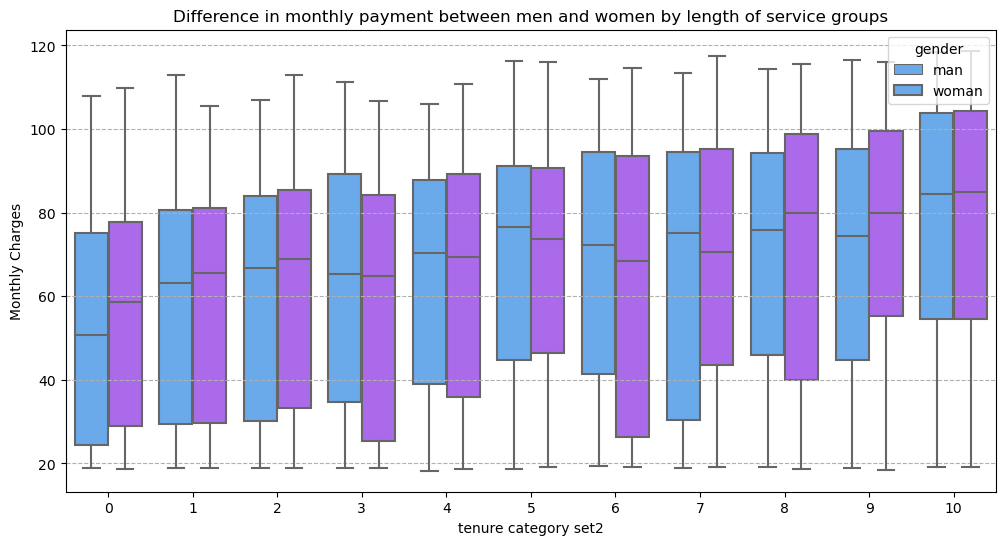

In [42]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tenure_category_set2', y='MonthlyCharges', hue='gender', palette='cool')
plt.title('Difference in monthly payment between men and women by length of service groups')
plt.xlabel('tenure category set2')
plt.ylabel('Monthly Charges')
plt.legend(title='gender', loc='upper right', labels=['man', 'woman'])
plt.grid(axis='y', linestyle='--')
plt.show()


In [43]:
#להוסיף ולעדכן
df = df.rename(columns=str.lower)
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_category_set1,tenure_category_set2,tenure_category_set3
0,7590-VHVEG,1,0,1,0,1,0,2,0,0,...,0,0,1,0,29.85,29.85,0,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,0,1,...,0,1,0,1,56.95,1889.50,0,1,5,3
2,3668-QPYBK,0,0,0,0,2,1,0,0,1,...,0,0,1,1,53.85,108.15,1,0,0,0
3,7795-CFOCW,0,0,0,0,45,0,2,0,1,...,0,1,0,2,42.30,1840.75,0,2,7,4
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,1,0,70.70,151.65,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,0,1,...,1,1,1,1,84.80,1990.50,0,1,3,2
7039,2234-XADUH,1,0,1,1,72,1,1,1,0,...,1,1,1,3,103.20,7362.90,0,3,10,6
7040,4801-JZAZL,1,0,1,1,11,0,2,0,1,...,0,0,1,0,29.60,346.45,0,0,1,1
7041,8361-LTMKD,0,1,1,0,4,1,1,1,0,...,0,0,1,1,74.40,306.60,1,0,0,0


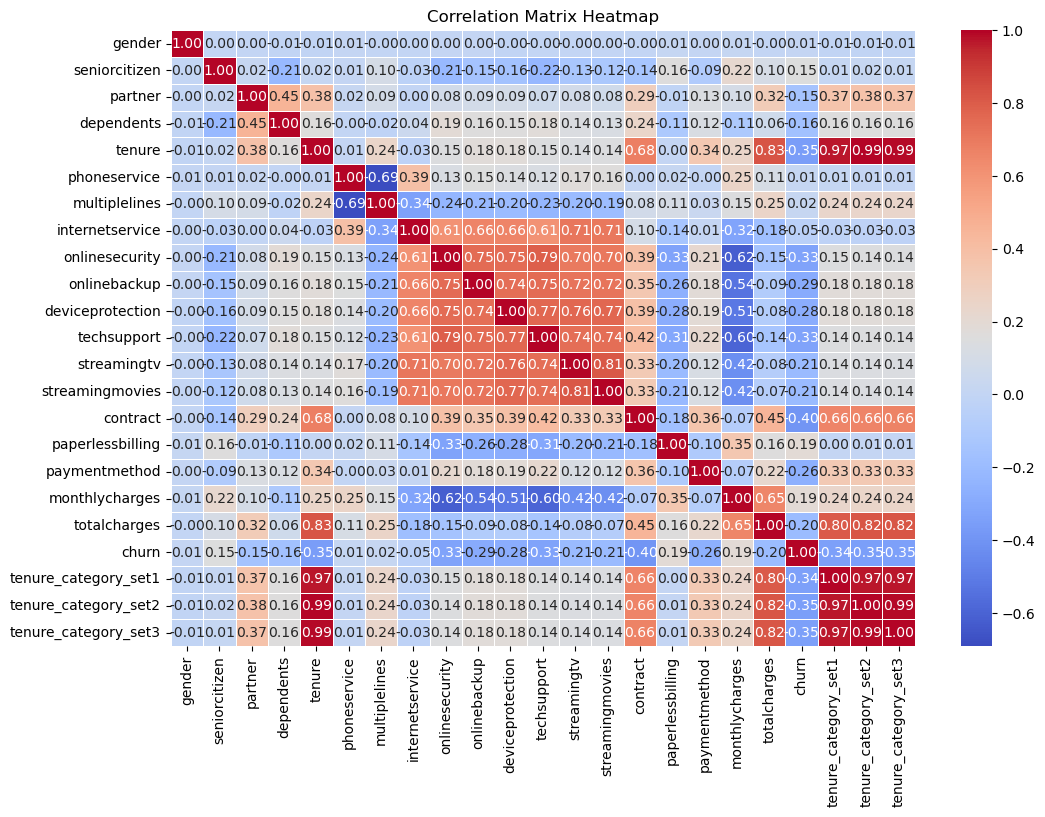

In [44]:
# חישוב קורלציות אחרי המרה
corr_matrix = df.corr(numeric_only=True)

# יצירת heatmap לכלל הנתונים
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


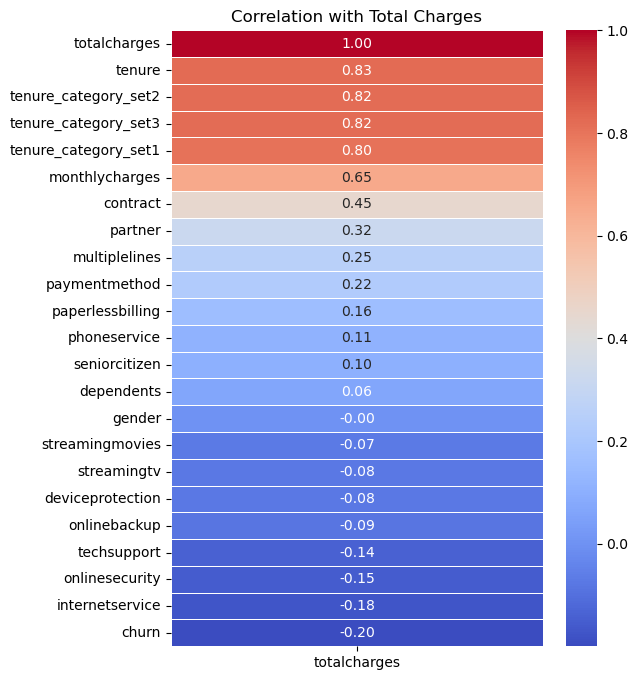

In [45]:
corr_totalcharges = corr_matrix[['totalcharges']].sort_values(by='totalcharges', ascending=False)


plt.figure(figsize=(6, 8))
sns.heatmap(corr_totalcharges, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Total Charges")
plt.show()


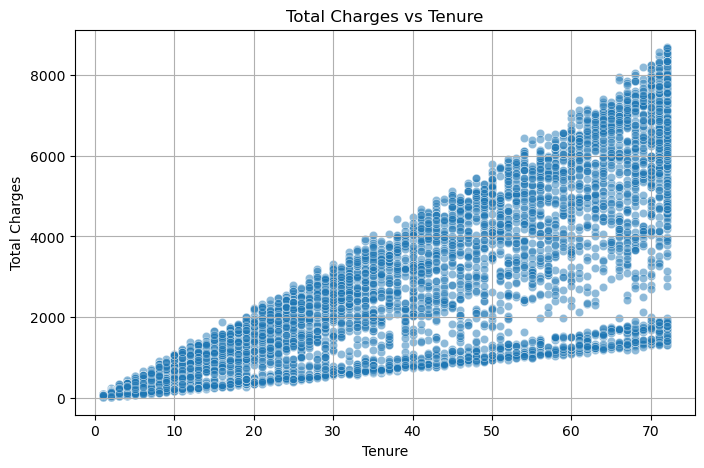

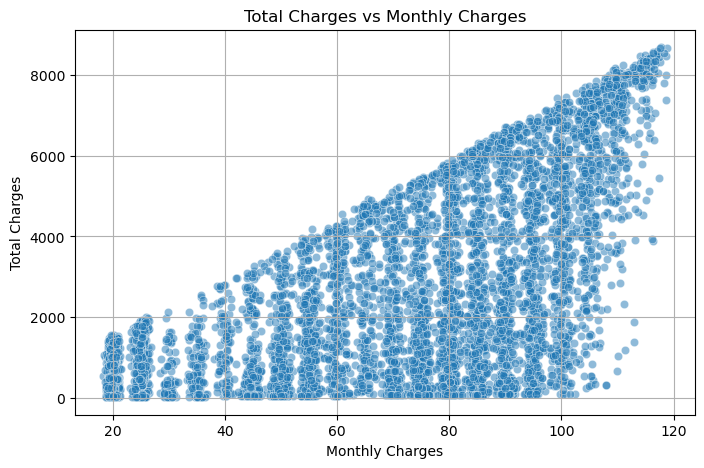

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tenure'], y=df['totalcharges'], alpha=0.5)
plt.title("Total Charges vs Tenure")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.grid()
plt.show()


#     נחוץ??
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['monthlycharges'], y=df['totalcharges'], alpha=0.5)
plt.title("Total Charges vs Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.grid()
plt.show()


In [47]:
#ML
df = df.drop(columns=['customerid'])
df = df.drop(columns=['tenure_category_set1'])
df = df.drop(columns=['tenure_category_set2'])
df = df.drop(columns=['tenure_category_set3'])
